In [18]:
from IPython import get_ipython
get_ipython().magic('reset -sf')#清空變數
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from matplotlib import colors as colors
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import multivariate_normal
import seaborn as sns
img_dir = '../images/'
data_dir = '../ml_data/'

/var/folders/c2/2qrlwbxx6zdf4q3z4bkl3q5r0000gn/T/ipykernel_4199/1150827444.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')#清空變數


# 生成兩組資料

In [12]:
def GenDataforTwo(n1,n2,mu1,mu2,Cov1,Cov2):
    mvn1 = multivariate_normal(mean=mu1, cov=Cov1)
    mvn2 = multivariate_normal(mean=mu2, cov=Cov2)
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X, y

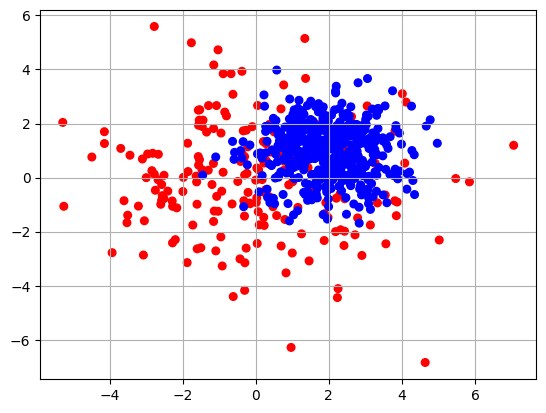

In [21]:
n1, n2 = 200, 500
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[4, 0], [0, 4]])
Cov2 = np.array([[1, 0], [0, 1]])
X, y = GenDataforTwo(n1,n2,m1,m2,Cov1,Cov2)
np.savetxt('demo_data7-4.txt', np.c_[X, y],\
      fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
        c=colors, s=30, marker="o")
plt.grid(True)
plt.savefig(img_dir + "gendatafortwo7-4.pdf", format='pdf')
plt.show()

In [19]:
D1 = np.loadtxt(data_dir + 'gendataforthree7-8.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
# 接下來要跑100次
K = 100

solver = 'adam'
hidden_layers = (20, )
Ann20= MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann20_trainingErr = np.zeros(K)
Ann20_testingErr = np.zeros(K)

hidden_layers = (40, )
Ann40 = MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann40_trainingErr = np.zeros(K)
Ann40_testingErr = np.zeros(K)

for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    Ann20.fit(X_train, y_train)
    Ann20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    Ann20_testingErr[i] = 1 - Ann20.score(X_test, y_test)
    Ann40.fit(X_train, y_train)
    Ann40_trainingErr[i] = 1 - Ann40.score(X_train, y_train)
    Ann40_testingErr[i] = 1 - Ann40.score(X_test, y_test)
print('ANN20 training Error:{:.4f}'.format(Ann20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(Ann20_testingErr.mean()))
print('ANN40 training Error:{:.4f}'.format(Ann40_trainingErr.mean()))
print('ANN40 testing Error:{:.4f}'.format(Ann40_testingErr.mean()))



ANN20 training Error:0.0472
ANN20 testing Error:0.0514
ANN40 training Error:0.0470
ANN40 testing Error:0.0507


In [13]:
# 載入第一筆資料
D1 = np.loadtxt(data_dir + 'demo_data7-1.txt', comments='#')
X = D1[:, 0:2]
y = D1[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
# 接下來要跑100次
K = 100

# 設定各個模型資訊

logreg = LogisticRegression(C=1e5)
logreg_trainingErr = np.zeros(K)
logreg_testingErr = np.zeros(K)


Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr = np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr = np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights=weights)
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr = np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights=weights)
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr = np.zeros(K)

solver = 'adam'
hidden_layers = (20, )
Ann20= MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann20_trainingErr = np.zeros(K)
Ann20_testingErr = np.zeros(K)

hidden_layers = (40, )
Ann40 = MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann40_trainingErr = np.zeros(K)
Ann40_testingErr = np.zeros(K)

# 訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    logreg.fit(X_train, y_train)
    logreg_trainingErr[i] = 1 - logreg.score(X_train, y_train)
    logreg_testingErr[i] = 1 - logreg.score(X_test, y_test)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    Ann20.fit(X_train, y_train)
    Ann20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    Ann20_testingErr[i] = 1 - Ann20.score(X_test, y_test)
    Ann40.fit(X_train, y_train)
    Ann40_trainingErr[i] = 1 - Ann40.score(X_train, y_train)
    Ann40_testingErr[i] = 1 - Ann40.score(X_test, y_test)


# print誤判率
print('logistic training Error:{:.4f}'.format(logreg_trainingErr.mean()))
print('logistic testing Error:{:.4f}'.format(logreg_testingErr.mean()))
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(Ann20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(Ann20_testingErr.mean()))
print('ANN40 training Error:{:.4f}'.format(Ann40_trainingErr.mean()))
print('ANN40 testing Error:{:.4f}'.format(Ann40_testingErr.mean()))



FileNotFoundError: ../ml_data/gendatafortwo7-1.txt not found.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

n1, n2, n3 = 200, 350,500
m1, m2 ,m3= np.array([0, 0]), np.array([4, 1]), np.array([6, -2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
Cov3 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B,C))
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3)*2))
np.savetxt('gendataforthree7-7.txt', np.c_[X, y],\
     fmt = "%.4f %.4f %d", header = "X1 X2 y")


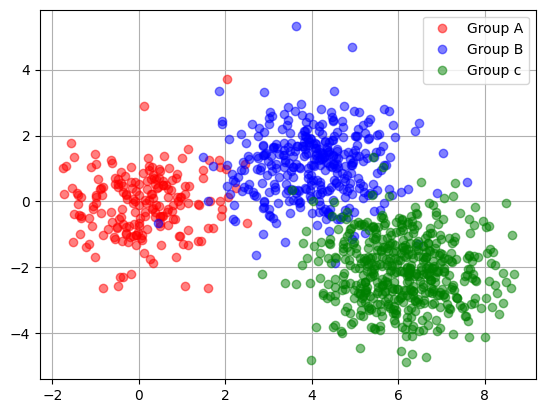

In [77]:
D5 = np.loadtxt(data_dir+'gendataforthree7-7.txt',comments='#')
Idx = (D5[:,2]==0)
plt.plot(D5[Idx, 0], D5[Idx, 1], 'ro',\
    alpha = 0.5, label = 'Group A')
Idx = (D5[:,2]==1)
plt.plot(D5[Idx,0], D5[Idx,1],'bo', \
    alpha = 0.5, label = 'Group B')
Idx = (D5[:,2]==2)
plt.plot(D5[Idx,0], D5[Idx,1],'go', \
    alpha = 0.5, label = 'Group c')
plt.grid(True)
plt.legend()
plt.savefig(img_dir+"gendataforthree7-7.pdf", format='pdf')
plt.show()

In [78]:
# 載入第一筆資料
D5 = np.loadtxt(data_dir+'gendataforthree7-7.txt',comments='#')
X = D5[:, 0:2]
y = D5[:, 2].astype('int')
# Group_name = np.array(['Group A', 'Group B'])#給群組名稱
# cmap_bold = ['darkblue', 'red']
# sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = Group_name[y], palette = cmap_bold,  alpha = 0.9, edgecolor = "black")
# 接下來要跑100次
K = 100

# 設定各個模型資訊

logreg = LogisticRegression(C=1e5)
logreg_trainingErr = np.zeros(K)
logreg_testingErr = np.zeros(K)


Lda = LinearDiscriminantAnalysis(tol=1e-6)
LDA_trainingErr = np.zeros(K)
LDA_testingErr = np.zeros(K)

Qda = QuadraticDiscriminantAnalysis(tol=1e-6, store_covariance=True)
QDA_trainingErr = np.zeros(K)
QDA_testingErr = np.zeros(K)

weights = 'uniform'
Knn5 = neighbors.KNeighborsClassifier(5, weights=weights)
KNN5_trainingErr = np.zeros(K)
KNN5_testingErr = np.zeros(K)

Knn15 = neighbors.KNeighborsClassifier(15, weights=weights)
KNN15_trainingErr = np.zeros(K)
KNN15_testingErr = np.zeros(K)

solver = 'adam'
hidden_layers = (20, )
Ann20= MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann20_trainingErr = np.zeros(K)
Ann20_testingErr = np.zeros(K)

hidden_layers = (40, )
Ann40 = MLPClassifier(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False,
                        activation='logistic',  tol=1e-6, random_state=0)
Ann40_trainingErr = np.zeros(K)
Ann40_testingErr = np.zeros(K)

# 訓練模型，跑出誤判率
for i in range(K):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    logreg.fit(X_train, y_train)
    logreg_trainingErr[i] = 1 - logreg.score(X_train, y_train)
    logreg_testingErr[i] = 1 - logreg.score(X_test, y_test)
    Lda.fit(X_train, y_train)
    LDA_trainingErr[i] = 1 - Lda.score(X_train, y_train)
    LDA_testingErr[i] = 1 - Lda.score(X_test, y_test)
    Qda.fit(X_train, y_train)
    QDA_trainingErr[i] = 1 - Qda.score(X_train, y_train)
    QDA_testingErr[i] = 1 - Qda.score(X_test, y_test)
    Knn5.fit(X_train, y_train)
    KNN5_trainingErr[i] = 1 - Knn5.score(X_train, y_train)
    KNN5_testingErr[i] = 1 - Knn5.score(X_test, y_test)
    Knn15.fit(X_train, y_train)
    KNN15_trainingErr[i] = 1 - Knn15.score(X_train, y_train)
    KNN15_testingErr[i] = 1 - Knn15.score(X_test, y_test)
    Ann20.fit(X_train, y_train)
    Ann20_trainingErr[i] = 1 - Ann20.score(X_train, y_train)
    Ann20_testingErr[i] = 1 - Ann20.score(X_test, y_test)
    Ann40.fit(X_train, y_train)
    Ann40_trainingErr[i] = 1 - Ann40.score(X_train, y_train)
    Ann40_testingErr[i] = 1 - Ann40.score(X_test, y_test)


# print誤判率
print('logistic training Error:{:.4f}'.format(logreg_trainingErr.mean()))
print('logistic testing Error:{:.4f}'.format(logreg_testingErr.mean()))
print('LDA training Error:{:.4f}'.format(LDA_trainingErr.mean()))
print('LDA testing Error:{:.4f}'.format(LDA_testingErr.mean()))
print('QDA training Error:{:.4f}'.format(QDA_trainingErr.mean()))
print('QDA testing Error:{:.4f}'.format(QDA_testingErr.mean()))
print('KNN5 training Error:{:.4f}'.format(KNN5_trainingErr.mean()))
print('KNN5 testing Error:{:.4f}'.format(KNN5_testingErr.mean()))
print('KNN15 training Error:{:.4f}'.format(KNN15_trainingErr.mean()))
print('KNN15 testing Error:{:.4f}'.format(KNN15_testingErr.mean()))
print('ANN20 training Error:{:.4f}'.format(Ann20_trainingErr.mean()))
print('ANN20 testing Error:{:.4f}'.format(Ann20_testingErr.mean()))
print('ANN40 training Error:{:.4f}'.format(Ann40_trainingErr.mean()))
print('ANN40 testing Error:{:.4f}'.format(Ann40_testingErr.mean()))



logistic training Error:0.0329
logistic testing Error:0.0349
LDA training Error:0.0352
LDA testing Error:0.0361
QDA training Error:0.0340
QDA testing Error:0.0354
KNN5 training Error:0.0314
KNN5 testing Error:0.0404
KNN15 training Error:0.0338
KNN15 testing Error:0.0380
ANN20 training Error:0.0585
ANN20 testing Error:0.0638
ANN40 training Error:0.0629
ANN40 testing Error:0.0684


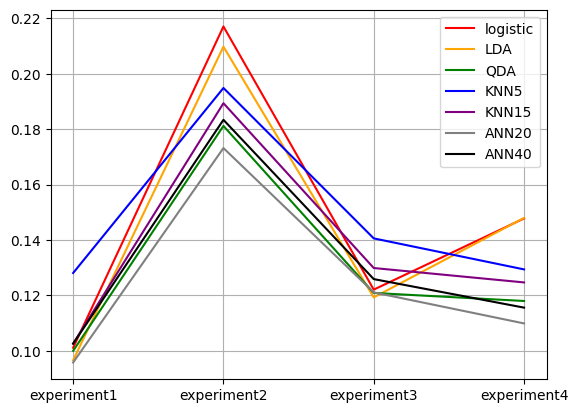

In [29]:
x=[1,2,3,4]
y_logistic=[0.1011,0.2171,0.1221,0.1478]
y_LDA=[0.0966,0.2098,0.1193,0.1480]
y_QDA=[0.1000,0.1812,0.1209,0.1180]
y_KNN5=[0.1281,0.1949,0.1406,0.1294]
y_KNN15=[0.1026,0.1894,0.1299,0.1247]
y_ANN20=[0.0958,0.1732,0.1211,0.1099]
y_ANN40=[0.1026,0.1834,0.1259,0.1156]

plt.plot(x, y_logistic, color='red',label='logistic')
plt.plot(x, y_LDA, color='orange',label='LDA')
plt.plot(x, y_QDA, color='green',label='QDA')
plt.plot(x, y_KNN5, color='blue',label='KNN5')
plt.plot(x, y_KNN15, color='purple',label='KNN15')
plt.plot(x, y_ANN20, color='gray',label='ANN20')
plt.plot(x, y_ANN40, color='black',label='ANN40')
plt.xticks([1, 2, 3, 4],
           ['experiment1', 'experiment2', 'experiment3', 'experiment4',])
plt.grid(True)
plt.legend()
# plt.savefig(img_dir+'experiment7-1_7-4.pdf', format='pdf')

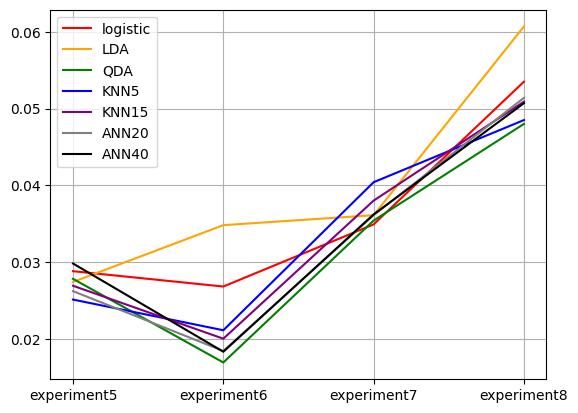

In [30]:
x=[1,2,3,4]
y_logistic=[0.0288,0.0268,0.0349,0.0535]
y_LDA=[0.0274,0.0348,0.0361,0.0607]
y_QDA=[0.0278,0.0169,0.0354,0.0480]
y_KNN5=[0.0251,0.0211,0.0404,0.0485]
y_KNN15=[0.0269,0.0200,0.0380,0.0509]
y_ANN20=[0.0262,0.0184,0.0361,0.0514]
y_ANN40=[0.0298,0.0183,0.0362,0.0507]

plt.plot(x, y_logistic, color='red',label='logistic')
plt.plot(x, y_LDA, color='orange',label='LDA')
plt.plot(x, y_QDA, color='green',label='QDA')
plt.plot(x, y_KNN5, color='blue',label='KNN5')
plt.plot(x, y_KNN15, color='purple',label='KNN15')
plt.plot(x, y_ANN20, color='gray',label='ANN20')
plt.plot(x, y_ANN40, color='black',label='ANN40')
plt.xticks([1, 2, 3, 4],
           ['experiment5', 'experiment6', 'experiment7', 'experiment8',])
plt.grid(True)
plt.legend()
# plt.savefig(img_dir+'experiment7-5_7-8.pdf', format='pdf')